# Laboratorio 2
Juan José Osorio - 202021720

Pablo Guatibonza - 202014393

Juan Sebastián Hoyos - 201822167


## Caso
MotorAlpes es una empresa dedicada a la venta y compra de vehículos usados, la cual cuenta con una plataforma en la que sus usuarios (individuos o compañías) pueden publicar vehículos sobre los cuales otros usuarios pueden hacer ofertas. Uno de sus principales objetivos es asegurar que los precios sean justos y además coherentes con las características principales y las condiciones en las que se encuentre el vehículo en cuestión. De esta manera pueden evitar que se presenten estafas u otras situaciones que puedan darle una mala imagen a la empresa.

Actualmente, MotorAlpes trabaja con un grupo de expertos que sirven como intermediarios en el proceso de negociación del precio de un vehículo, estableciendo un rango sobre el cual ambas partes pueden llegar a un acuerdo. Sin embargo, debido a la cantidad de usuarios que interactúan constantemente con la plataforma, este proceso es cada vez más lento y se ha encontrado que en muchas ocasiones no es del todo preciso.

La empresa busca entonces una alternativa mucho más práctica y para lograrlo ha puesto a su disposición un conjunto de datos que reúne información general de todo tipo de vehículos usados junto a los precios que se consideran apropiados. El objetivo será entonces construir un modelo que apoye en la resolución de las siguientes tareas:

Identificar las variables que más impactan el precio de un vehículo usado.
Predecir el precio de un vehículo usado a partir de las variables de mayor interés.

## 1. Entendimiento de los datos
### 1.1 Importación de librerías

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from joblib import dump,load
import warnings
warnings.filterwarnings('ignore')

### 1.2 Carga de los datos

In [591]:
df_original = pd.read_csv(
    'data/MotorAlpes_data.csv',
    sep=',',
    encoding='utf-8',
    index_col=0)
df_motorAlpes = df_original.copy()

In [592]:
# Dataframe más pequeño para pruebas
df_motorAlpes_new = pd.read_csv(
    'data/MotorAlpes_test.csv',
    sep=',',
    encoding='utf-8',
    index_col=0
)

### 1.3 Entendimiento de los datos

In [593]:
df_motorAlpes.shape

(7115, 11)

In [594]:
df_motorAlpes_new.shape

(791, 10)

In [595]:
df_motorAlpes.head()

,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
0,NaN,145500.0,NaN,Individual,5.0,Diesel,Manual,23.40,1248.0,74.00,5451.90
1,2014.0,120000.0,Second Owner,Individual,5.0,Diesel,Manual,21.14,1498.0,103.52,4482.68
2,2006.0,140000.0,Third Owner,Individual,5.0,Petrol,Manual,17.70,13524.0,78.00,1914.22
3,2010.0,127000.0,First Owner,Individual,5.0,Diesel,Manual,23.00,NaN,NaN,2725.95
4,2007.0,120000.0,First Owner,Individual,5.0,Petrol,Manual,16.10,1298.0,88.20,1574.99


In [596]:
df_motorAlpes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7115 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6876 non-null   float64
 1   km_driven      6917 non-null   float64
 2   owner          6876 non-null   object 
 3   seller_type    7115 non-null   object 
 4   seats          7115 non-null   float64
 5   fuel           7115 non-null   object 
 6   transmission   7115 non-null   object 
 7   mileage        6917 non-null   float64
 8   engine         6835 non-null   float64
 9   max_power      6847 non-null   float64
 10  selling_price  6714 non-null   float64
dtypes: float64(7), object(4)
memory usage: 667.0+ KB


In [597]:
df_motorAlpes.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


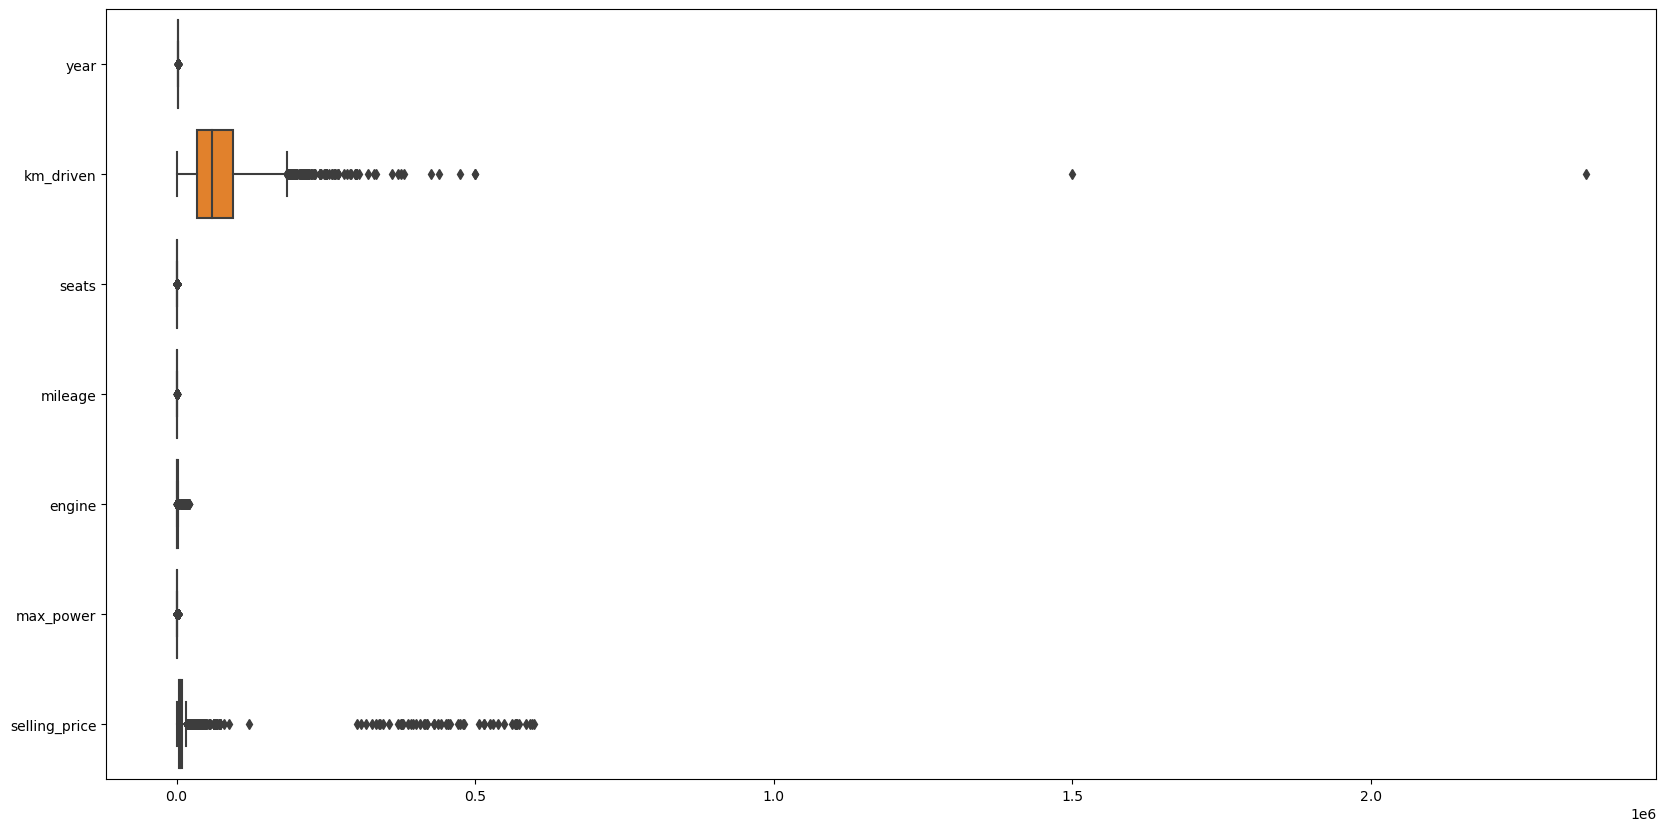

In [598]:
# Visualización de las variables numéricas
fig = plt.figure(figsize=(20, 10))
ax = sns.boxplot(data=df_motorAlpes, orient='h')

In [599]:
# Información de las variables numéricas
variablesNumericas = [
    'year',
    'km_driven',
    'seats',
    'mileage',
    'engine',
    'max_power',
    'selling_price'
]

df_motorAlpes[variablesNumericas].describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,6876.000000,6.917000e+03,7115.000000,6917.000000,6835.000000,6847.000000,6714.000000
mean,2013.980948,6.911118e+04,5.411103,19.523473,1835.489539,141.981595,11261.208041
std,3.852565,5.796521e+04,0.953555,4.241574,2363.919253,274.956684,40765.694516
min,1994.000000,1.000000e+00,2.000000,0.000000,4.000000,1.070000,1.910000
25%,2012.000000,3.400000e+04,5.000000,16.800000,1197.000000,68.050000,3210.560000
50%,2015.000000,6.000000e+04,5.000000,19.330000,1248.000000,83.100000,5451.900000
75%,2017.000000,9.400000e+04,5.000000,22.320000,1597.000000,104.680000,8480.740000
max,2020.000000,2.360457e+06,14.000000,46.816000,19972.000000,1995.640000,598983.440000


#### Revisión de los datos del dataframe de entrenamiento

In [600]:
df_motorAlpes_new.describe()

,year,km_driven,seats,mileage,engine,max_power
count,764.000000,769.000000,791.00000,769.000000,763.000000,762.000000
mean,2013.816754,70209.823147,5.46397,19.502421,1835.280472,141.170696
std,3.904554,48346.299689,1.00802,4.173028,2179.398466,276.544074
min,1996.000000,2000.000000,4.00000,0.000000,47.000000,1.270000
25%,2011.000000,35000.000000,5.00000,16.520000,1197.000000,68.050000
50%,2015.000000,67000.000000,5.00000,19.330000,1368.000000,83.100000
75%,2017.000000,100000.000000,5.00000,22.540000,1598.000000,104.412500
max,2020.000000,577414.000000,10.00000,37.240000,19140.000000,1997.270000


In [601]:
df_motorAlpes_new['owner'].value_counts()

First Owner             513
Second Owner            185
Third Owner              49
Fourth & Above Owner     16
Test Drive Car            1
Name: owner, dtype: int64

In [602]:
df_motorAlpes_new['seller_type'].value_counts()

Individual          672
Dealer               99
Trustmark Dealer     20
Name: seller_type, dtype: int64

In [603]:
df_motorAlpes_new['fuel'].value_counts()

Diesel    456
Petrol    328
CNG         4
LPG         3
Name: fuel, dtype: int64

In [604]:
df_motorAlpes_new['transmission'].value_counts()

Manual       698
Automatic     93
Name: transmission, dtype: int64

## 2. Identificación de las variables a utilizar


In [605]:
"""
La variable a utilizar objetivo es 'selling_price'
"""
df_motorAlpes['selling_price'].describe()

count      6714.000000
mean      11261.208041
std       40765.694516
min           1.910000
25%        3210.560000
50%        5451.900000
75%        8480.740000
max      598983.440000
Name: selling_price, dtype: float64

## 3. Preparación y limpieza de los datos
Para entrenar un modelo de regresión lineal todos los atributos deben ser numéricos. Con ayuda de los expertos, se seleccionan las variables numéricas que se consideran más importantes para la estimación de `selling_price`.  Adicionalmente, se debe asegurar que tanto para las variables (features) a ser consideradas para el entrenamiento del modelo como para la variable a estimar (objetivo) se debe asegurar que no existan valores vacíos. Se decide eliminar los registros que tengan valores vacíos en las variables a considerar dado que el experto recomienda no realizar ninguna imputación.

### 3.1 Completitud

In [606]:
# Variables definidas de forma conjunta con el experto
features = ['year', 'engine', 'max_power', 'mileage', 'km_driven']

In [607]:
# Se calcula el porcentaje de los valores nulos por columna
(df_motorAlpes.isnull().sum()*100 / df_motorAlpes.shape[0]).sort_values(ascending=False)

selling_price    5.635980
engine           3.935348
max_power        3.766690
year             3.359100
owner            3.359100
km_driven        2.782853
mileage          2.782853
seller_type      0.000000
seats            0.000000
fuel             0.000000
transmission     0.000000
dtype: float64

In [608]:
"""
Se va a completar los datos faltantes de year, engine, max_power, km_driven y mileage con la media
"""
mediaAnio = df_motorAlpes['year'].mean()
df_motorAlpes['year'].fillna(mediaAnio, inplace=True)
df_motorAlpes_new['year'].fillna(mediaAnio, inplace=True)

In [609]:
mediaEngine = df_motorAlpes['engine'].mean()
df_motorAlpes['engine'].fillna(mediaEngine, inplace=True)
df_motorAlpes_new['engine'].fillna(mediaEngine, inplace=True)

In [610]:
mediaPow = df_motorAlpes['max_power'].mean()
df_motorAlpes['max_power'].fillna(mediaPow, inplace=True)
df_motorAlpes_new['max_power'].fillna(mediaPow, inplace=True)

In [611]:
mediaKM = df_motorAlpes['km_driven'].mean()
df_motorAlpes['km_driven'].fillna(mediaKM, inplace=True)
df_motorAlpes_new['km_driven'].fillna(mediaKM, inplace=True)

In [612]:
mediaMile = df_motorAlpes['mileage'].mean()
df_motorAlpes['mileage'].fillna(mediaMile, inplace=True)
df_motorAlpes_new['mileage'].fillna(mediaMile, inplace=True)

In [613]:
mediaPrice = df_motorAlpes['selling_price'].mean()
df_motorAlpes['selling_price'].fillna(mediaPrice, inplace=True)

In [614]:
df_motorAlpes.shape

(7115, 11)

In [615]:
df_motorAlpes_new.shape

(791, 10)

#### 3.3 Consistencia

In [616]:
#Rescalamos la variable km_driven
lim_infKM = 1
lim_supKM =  2360.457
df_motorAlpes['km_driven'] = df_motorAlpes['km_driven'].apply(lambda x: lim_infKM if x < lim_infKM else lim_supKM if x > lim_supKM else x)

In [617]:
#Imputamos la variable selling_price para que este en el rango adecuado
lim_inf = 363.45
lim_sup = 121153.38
valor_reemplazoS = df_motorAlpes[(df_motorAlpes['selling_price'] >= lim_inf) & (df_motorAlpes['selling_price'] <= lim_sup)]['selling_price'].median()
df_motorAlpes['selling_price'] = df_motorAlpes['selling_price'].apply(lambda x: valor_reemplazoS if x < lim_inf or x > lim_sup else x)

In [618]:
#Imputamos la variable engine para que este en el rango adecuado
lim_infE = 624
lim_supE = 3604
df_motorAlpes['engine'] = df_motorAlpes['engine'].apply(lambda x: lim_infE if x < lim_infE else lim_supE if x > lim_supE else x)
df_motorAlpes.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000
mean,2013.980948,2356.007624,5.411103,19.523473,1525.441753,141.981595,8042.684443
std,3.787297,65.317622,0.953555,4.182131,616.122415,269.727855,9589.225800
min,1994.000000,1.000000,2.000000,0.000000,624.000000,1.070000,363.460000
25%,2012.000000,2360.457000,5.000000,16.800000,1197.000000,69.000000,3392.290000
50%,2014.000000,2360.457000,5.000000,19.523473,1341.000000,84.000000,5875.930000
75%,2017.000000,2360.457000,5.000000,22.320000,1835.489539,112.000000,9025.930000
max,2020.000000,2360.457000,14.000000,46.816000,3604.000000,1995.640000,121153.380000


In [619]:
#Imputamos la variable max_power para que este en el rango adecuado
lim_infM = 32.8
lim_supM = 400
df_motorAlpes['max_power'] = df_motorAlpes['max_power'].apply(lambda x: lim_infM if x < lim_infM else lim_supM if x > lim_supM else x)
df_motorAlpes.describe()

,year,km_driven,seats,mileage,engine,max_power,selling_price
count,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000
mean,2013.980948,2356.007624,5.411103,19.523473,1525.441753,103.412174,8042.684443
std,3.787297,65.317622,0.953555,4.182131,616.122415,66.591555,9589.225800
min,1994.000000,1.000000,2.000000,0.000000,624.000000,32.800000,363.460000
25%,2012.000000,2360.457000,5.000000,16.800000,1197.000000,69.000000,3392.290000
50%,2014.000000,2360.457000,5.000000,19.523473,1341.000000,84.000000,5875.930000
75%,2017.000000,2360.457000,5.000000,22.320000,1835.489539,112.000000,9025.930000
max,2020.000000,2360.457000,14.000000,46.816000,3604.000000,400.000000,121153.380000


### 3.2 Búsqueda de relaciones entre variables (diagramas de dispersión)
Si se logra visualizar o cuantificar una alta correlación entre las variables a usar para el entrenamiento del modelo con respecto a la variable objetivo, se podrán soportar las decisiones del experto con base en la evidencia.

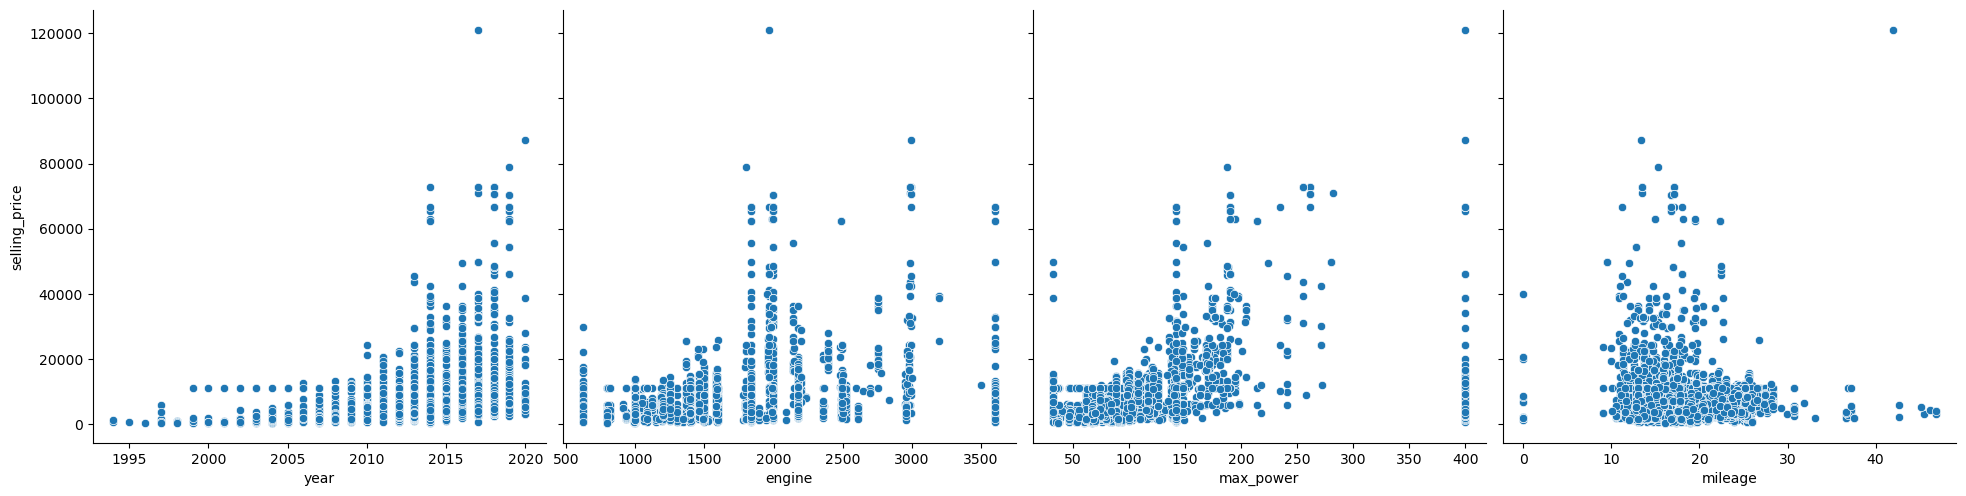

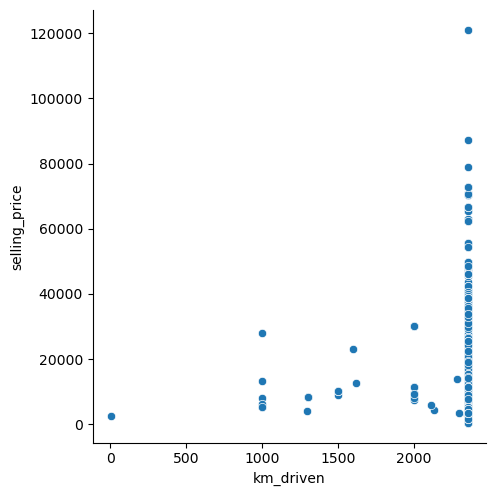

In [620]:
"""
Relación de selling_price con otras variables
"""
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[:4], kind='scatter')
sns.pairplot(df_motorAlpes, height=5, y_vars='selling_price', x_vars=features[4:], kind='scatter')

De las gráficas anteriores vemos que unos buenos candidatos son:
- year
- km_driven
- engine

### 3.3 Búsqueda de relaciones entre variables (Matriz de correlaciones)
Buscamos cuáles de las columnas tiene una relación con `selling_price` pero ahora utilizando correlaciones. La regresión lineal asume que las variables de entrada son independientes entre ellas (a nivel práctico que no se encuentran altamente correlacionados). Se revisará ese supuesto con la siguiente gráfica.

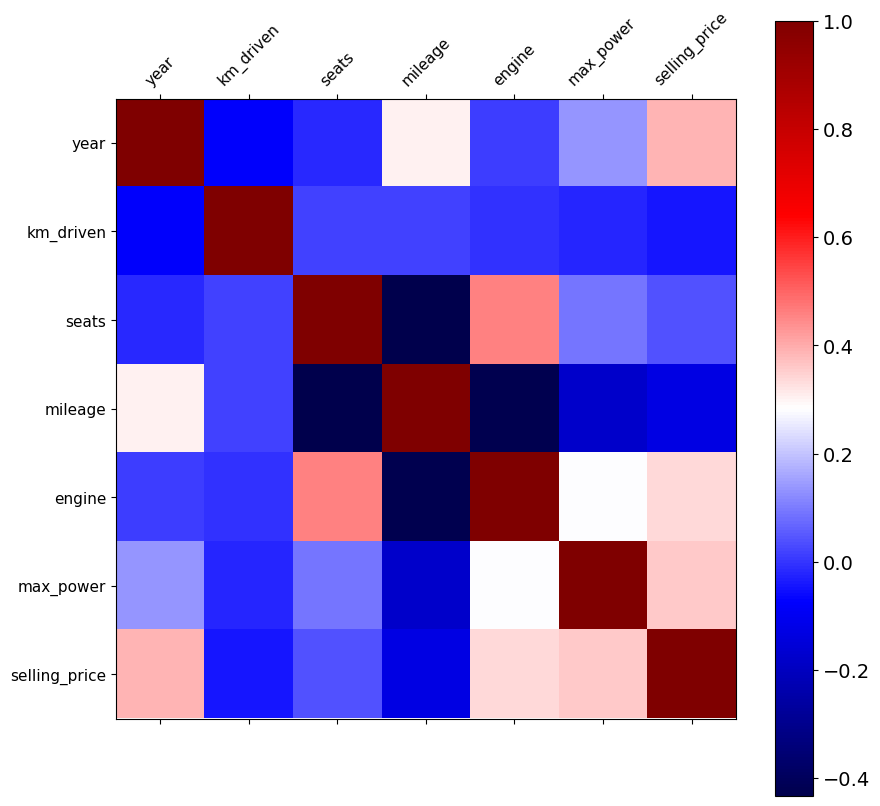

In [621]:
f = plt.figure(figsize=(10, 10))
df_float = df_motorAlpes.select_dtypes(['float64'])

plt.matshow(df_float.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11, rotation=45)
plt.yticks(range(df_float.select_dtypes(['float64']).shape[1]), df_float.select_dtypes(['float64']).columns, fontsize=11)

cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

## 4. Modelamiento (Particionamiento del conjunto de datos en entrenamiento y prueba)
### 4.1 Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *selling_price* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos desconocidos.Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%

In [622]:
X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes[features], df_motorAlpes['selling_price'], test_size=0.3, random_state=1)

In [623]:
X_train.shape, y_train.shape

((4980, 5), (4980,))

In [624]:
X_test.shape, y_test.shape

((2135, 5), (2135,))

### Entrenamiento del modelo
Se calcula la regresión lineal con los datos de entrenamiento utilizando sklearn.

In [625]:
regression = LinearRegression()

In [626]:
regression.fit(X_train, y_train)

LinearRegression()

### 4.2 Interpretación de los coeficientes y del intercepto
Los coeficientes de la regresión brindan una intuición del impacto o la fuerza de una característica en la predicción/estimación de la variable objetivo.

In [627]:
pd.DataFrame({'columns': features, 'coeficientes': regression.coef_})

,columns,coeficientes
0,year,986.197740
1,engine,3.715250
2,max_power,29.727378
3,mileage,-235.437041
4,km_driven,-1.396539


Note que las características ("features") se encuentran en diferentes escalas, rangos o grados de magnitud, razón por la cuál la interpretación de los coeficientes puede no ser la correcta. Si bien este no es el escenario, otro posible problema del uso de características en diferentes escalas es que el modelo se puede sesgar hacia las que tienen mayores escalas, basando su estimación mayoritariamente en estas y tendiendo a descartar las otras.

Por otro lado, el intercepto suele ser útil para determinar un valor de base en la estimación, en este caso un nivel mínimo de `selling_price` incluso si todas las características tuvieran valores iguales a cero.

In [628]:
regression.intercept_

-1979057.3857209974

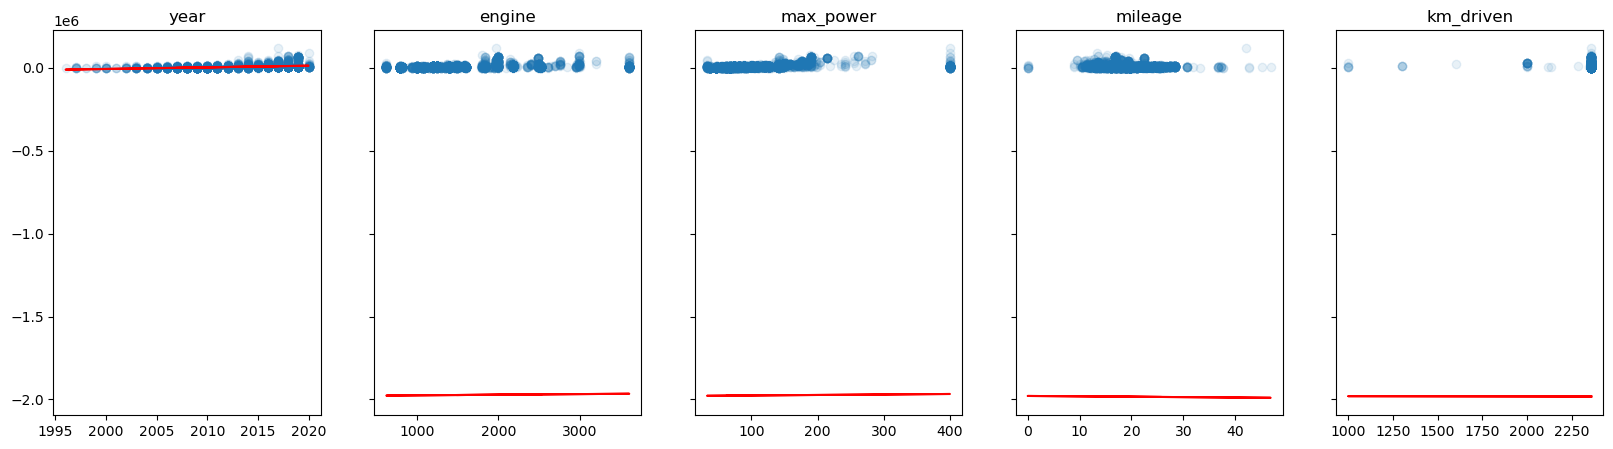

In [629]:
f, axs = plt.subplots(1, len(features), figsize=(20, 5), sharey=True)

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha=0.1)
    axs[i].plot(x, m*x + b, 'r')
    axs[i].set_title(col)

## 5. Evaluación cuantitativa
**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [630]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 4159.960939941836
Test: 4259.59185277261


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

**Revisa la métrica MAPE**, puede ser muy interesante para explicar mejor a un experto el resultado.

In [631]:
print("Train:", mean_squared_error(y_train, regression.predict(X_train)))
print("Test:", mean_squared_error(y_test, regression.predict(X_test)))

Train: 61997585.72888625
Test: 64419369.589739546


Análisis de error

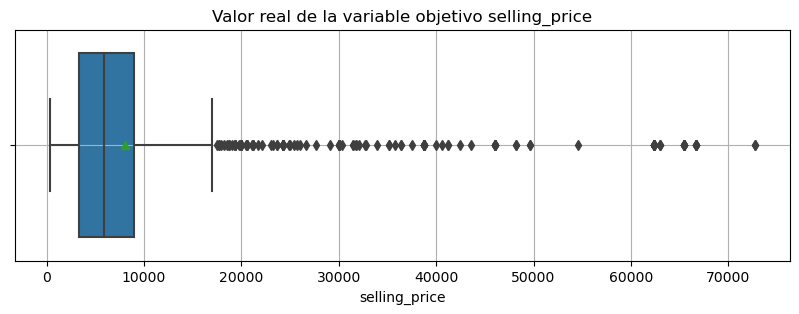

In [632]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=y_test, showmeans=True, orient='h')
plt.title('Valor real de la variable objetivo selling_price')
plt.grid()
plt.show()

In [633]:
y_test.describe()

count     2135.000000
mean      8064.097972
std       9738.824210
min        363.460000
25%       3331.720000
50%       5875.930000
75%       8965.350000
max      72692.030000
Name: selling_price, dtype: float64

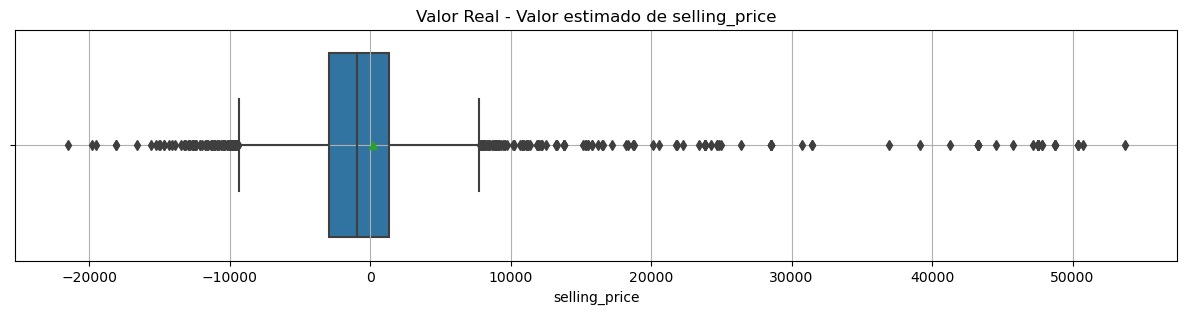

In [634]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test)), showmeans = True, orient = 'h')
plt.title('Valor Real - Valor estimado de selling_price')
plt.grid()
plt.show()

In [635]:
abs(y_test - regression.predict(X_test)).describe()

count     2135.000000
mean      4259.591853
std       6804.184858
min          1.910310
25%       1117.924568
50%       2309.816681
75%       4549.222929
max      53695.264882
Name: selling_price, dtype: float64

Se podría decir que los resultados de este primer modelo son aceptables dado que:
1) Las métricas de error para el dataset de entrenamiento y prueba son muy similares. No se evidencian problemas de sobreajuste (overfitting). El sobreajuste sucede cuando el modelo es muy complejo. Un modelo es complejo cuando hay una gran variedad de parámetros en comparación con la cantidad de observaciones que se tiene. Debido a esto, el modelo no podrá aplicarse sobre datos nuevos, es decir, servirá para los datos de prueba, pero para los tests
2) Para el conjunto de prueba los valores de la variable objetivo están centrados en 4259 dólares, con una desviación estandar de 6804 dólares, mientras que el 50% de los errores de estimación del modelo se encuentran  en $\pm 2309.81$ dólares 

## 6. Evaluación cualitativa

### 6.1 Entrenamiento de un segundo modelo usando normalización
Scikit-Learn permite integrar el proceso de normalización de características dentro del proceso de entrenamiento/predicción de los modelos mediante el uso de Pipelines. Un Pipeline permite ejecutar de forma secuencial un conjunto de transformaciones de datos, selección de variables, entre otros, seguido del paso de entrenamiento o predicción.

Para poder realizar la evaluación cualitativa, es necesario normalizar los coeficientes obtenidos en la regresión. De esta manera se puede establecer correctamente una relación entre ellos. 

In [636]:

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [637]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [638]:
pd.DataFrame({'columns': features, 'coef': pipeline['model'].coef_})

,columns,coef
0,year,3674.952693
1,engine,2279.674837
2,max_power,2049.483170
3,mileage,-970.345689
4,km_driven,-85.764363


In [639]:
pipeline['model'].intercept_

8033.50414564348

In [640]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 4159.960939941787
Test: 4259.5918527725635

RMSE:
Train: 7873.854566150315
Test: 8026.16780224159


Si bien las métricas de error no presentan cambios importantes, los coeficientes del modelo de regresión pueden ser comparados directamente dado que todas las características se encuentran en la misma escala.

Como los datos ya están normalizados, se pueden hacer varias afirmaciones sobre los coeficientes. En primer lugar, el coeficiente que mas aporta es el de year, el cual quiere decir que entre mas reciente sea un vehículo, este será mas caro. Por otro lado, están los coeficientes de mileage y km_driven, los cuales aportan negativamente al precio del vehículo. Mileage es la característica que mas afecta negativamente al precio, pues indica la cantidad de kilometros que se pueden hacer por litro de gasolina. De la misma manera, la característica km_driven indica que entre mas kilometros se haya conducido el carro, este será mas barato. Finalmente, la características engine y max_power ayudan a mejorar el precio del carro, pues para engine entre mas centimetros cúbicos tenga el vehículo, mayor es su precio. De la misma manera sucede con max_power. Sin embargo, su coeficiente es tan pequeño que no aporta de manera considerable al precio del carro.

En conclusión, todas las variables usadas anteriormente son importantes para el desarollo del modelo, a excepción de max_power, pues su coeficiente es muy pequeño en comparación al de los demas.

### 6.2 Validación de supuestos de la regresión 

Este paso es importante para poder interpretar de manera apropiada el modelo construido
#### 6.2.1 Colinealidad 

Es necesario que las columnas no tengan (o tengan muy poca) colinealidad/correlación.


<AxesSubplot: >

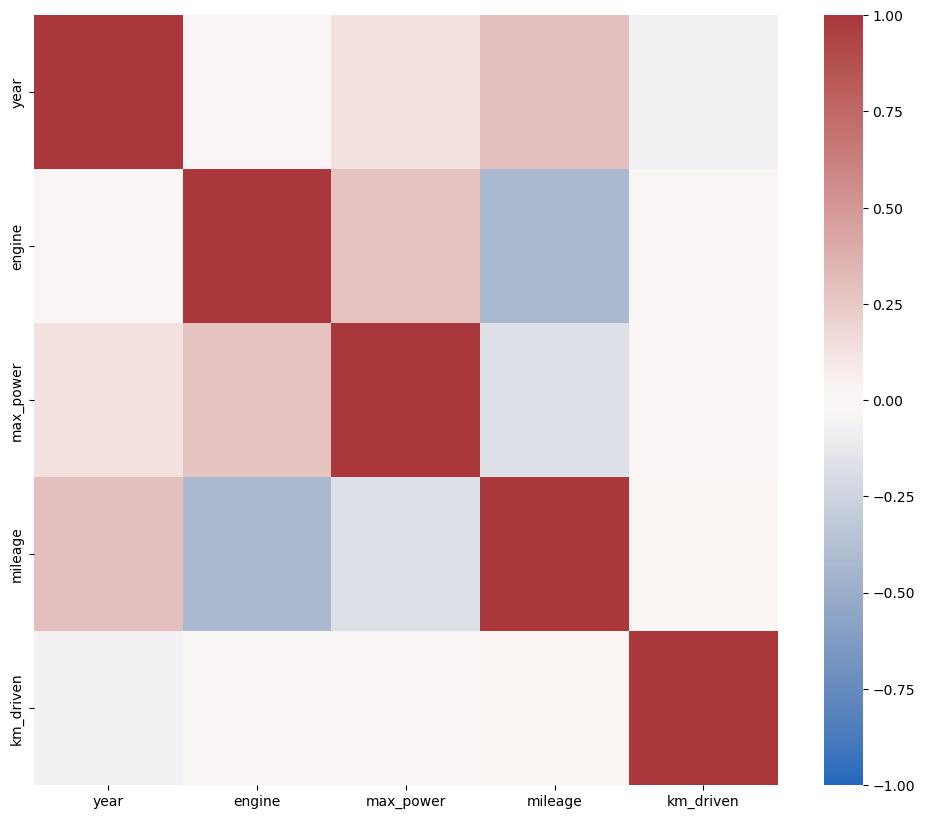

In [641]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_motorAlpes[features].corr(), cmap = 'vlag', vmin = -1, vmax = 1)

Como se puede ver, no hay correlación entre las columnas, pues según el diagrama de calor, cuando las columnas están relacionadas, su color tiende a un rojo o azul, pero en la anterior grafica los colores tienden al blanco, el cual indica que no hay relación

#### 6.2.2 Linealidad

Es necesario que la relación entre cada variable explicativa y la varable objetivo sea lineal. Muchas veces la mejor forma de comprobarlo es visualmente:  

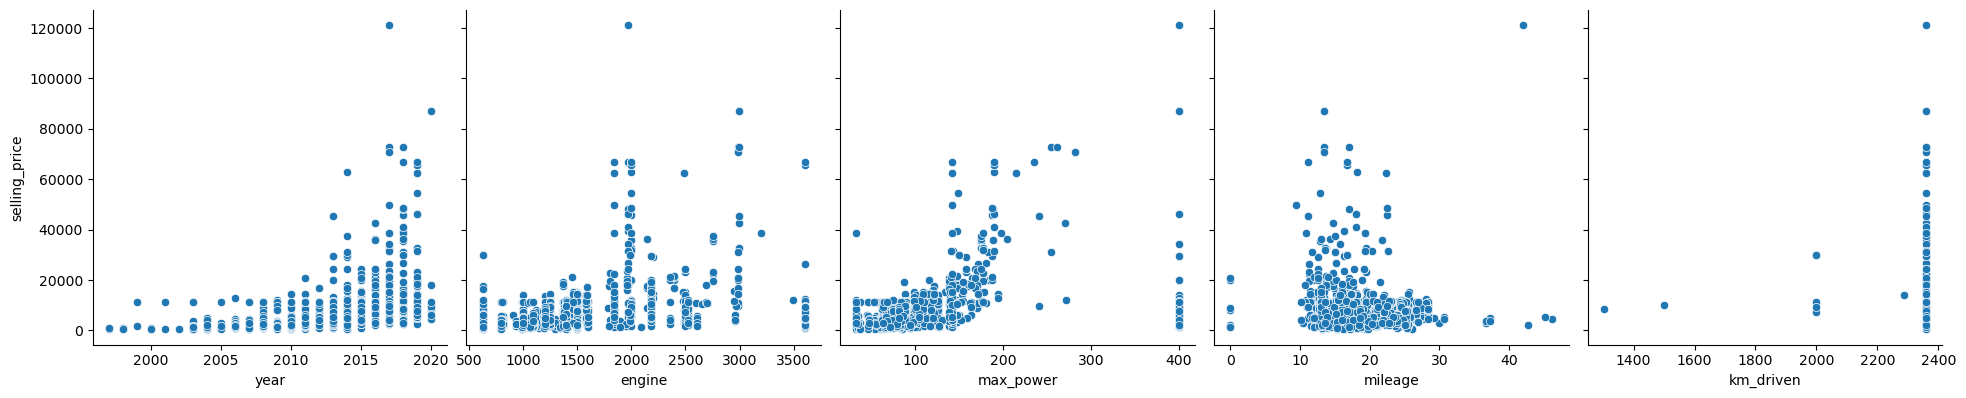

In [642]:
sns.pairplot(df_motorAlpes.sample(2000), height = 4, y_vars = 'selling_price', x_vars = features, kind = 'scatter')

¿Es posible que haya una relación no lineal entre year y selling price? 

In [643]:
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [644]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [645]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 3385.2122494821747
Test: 3588.3725040068193

RMSE:
Train: 6287.005076293493
Test: 6666.534866940889


En comparación a los datos obtenidos en la evaluación cuantitativa, hay una reducción de error, por lo que se podría asumir una relación no lineal entre year y selling price

#### 6.2.3 Normalidad en los errores

Otro supuesto de la regresión lineal es que los errores tienen una distribución normal. Para esto se puede usar:
* Grafico de dispersión entre los errores y el valor predicho
* Grafico Q-Q

##### Dispersión
##### Q-Q Plots

In [646]:
errors = (pipeline.predict(X_train) - y_train).values

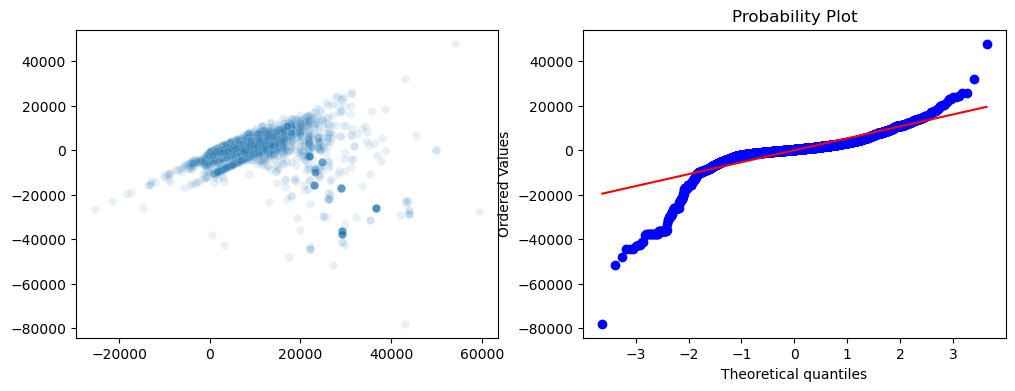

In [647]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

# Dispersión
sns.scatterplot(x = pipeline.predict(X_train), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist = 'norm', plot = axes[1])

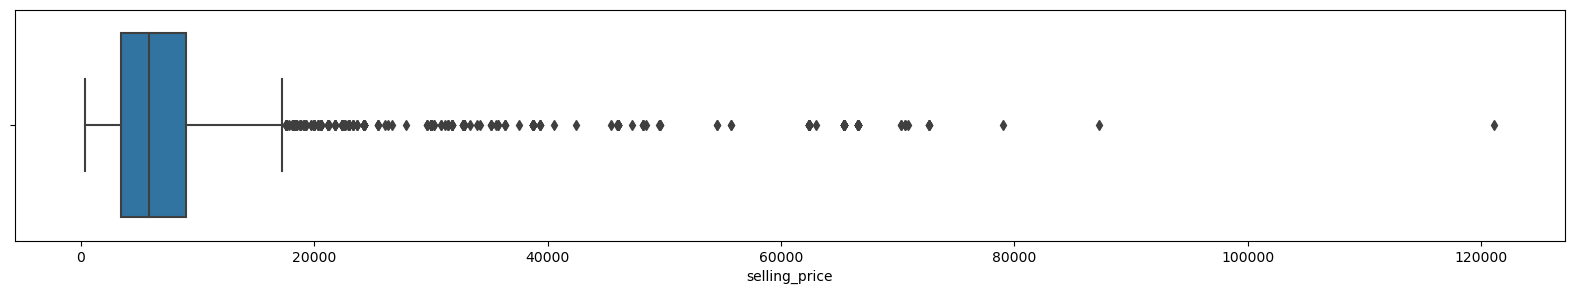

In [648]:
plt.figure(figsize = (20, 3))
ax = sns.boxplot(x=y_train, orient = 'h')

In [649]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    return df[mask]

In [650]:
df_motorAlpes_outliers=remove_outliers(df_motorAlpes,'selling_price')

In [651]:
X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)

In [652]:
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [653]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [654]:
print('MAE:')
print('Train:', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test:', mean_absolute_error(y_test, pipeline.predict(X_test)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 1712.7195111576
Test: 1698.7281013335628

RMSE:
Train: 2367.68059908085
Test: 2336.5250203085466


Como se puede ver, los errores se disminuyeron de una manera considerable sin los outliers

#### 6.2.4 Varianza constante(Homocedasticidad)

Este supuesto exige que la varianza en los errores se mantenga constante a medida que varia la variable objetivo. Al igual que los otros supuestos, la mejor forma de identificarlo es visualmente, graficando la variable objetivo contra los errores. 

In [655]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

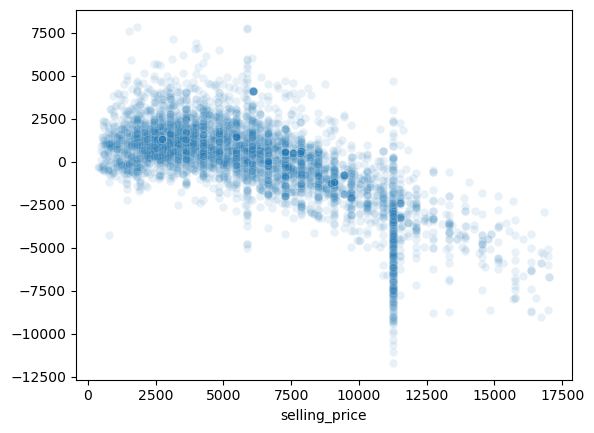

In [656]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

Una mala grafica puede indicar que se necesita una transformación, o que hace falta una variable extra.

In [657]:
features2=['year','km_driven','seats','mileage','engine','max_power']
#Se agrega el feature seats para revisar si se puede mejorar la grafica para la varianza constante

X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features2], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)

In [658]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [659]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

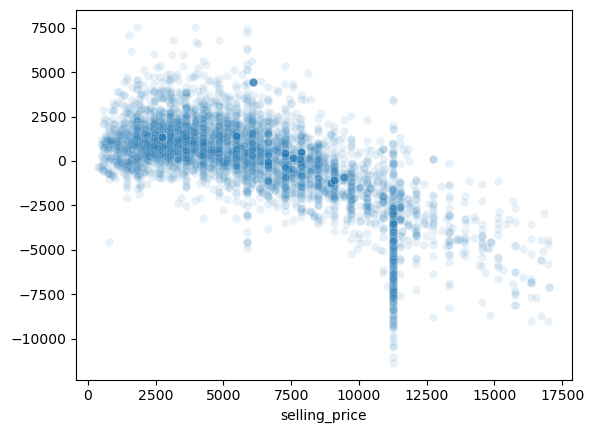

In [660]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

Lo anterior indica que al añadir otra columna, la varianza deja de ser tan constante como en la grafica anterior. Por lo tanto, no hay que incluir la variable seats

Ahora se intentara solo con 2 variables, las cuales son year y km_driven

In [661]:
features3=['year','km_driven']

In [662]:
X_train, X_test, y_train, y_test = train_test_split(df_motorAlpes_outliers[features3], df_motorAlpes_outliers['selling_price'], test_size = 0.3, random_state = 1)

In [663]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [664]:
errors = (pipeline.predict(X_train) - y_train).values

<AxesSubplot: xlabel='selling_price'>

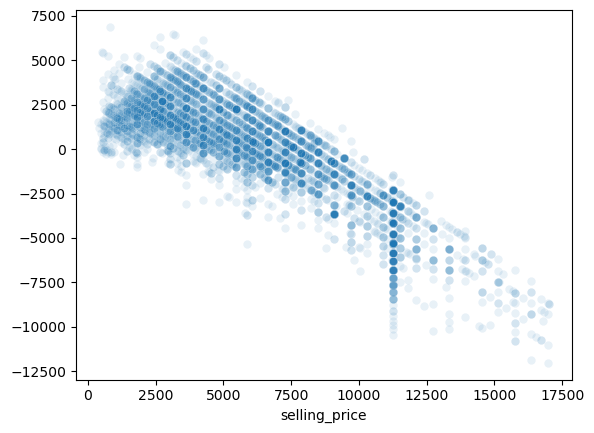

In [665]:
sns.scatterplot(x = y_train, y = errors, alpha = 0.1)

En este caso, se puede ver que la varianza tiende a ser mas constante que en los casos anteriores. Por lo tanto, es apropiado solo tomar las caracteristicas year y km_driven

## 7. Persistencia del modelo y estimación para el nuevo conjunto de datos

In [666]:
filename = 'modelo.joblib'

In [667]:
dump(pipeline, filename)

['modelo.joblib']

In [668]:
pipeline_loaded = load(filename)

In [669]:
df_motorAlpes_new['selling_price'] = pipeline_loaded.predict(df_motorAlpes_new[features3])

<AxesSubplot: xlabel='selling_price', ylabel='Count'>

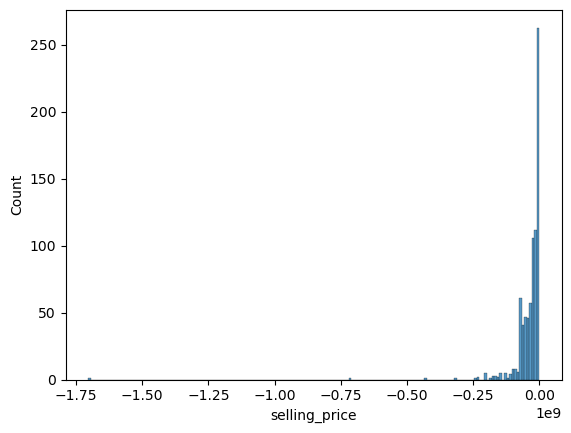

In [670]:
sns.histplot(df_motorAlpes_new['selling_price'])

<AxesSubplot: xlabel='selling_price', ylabel='Count'>

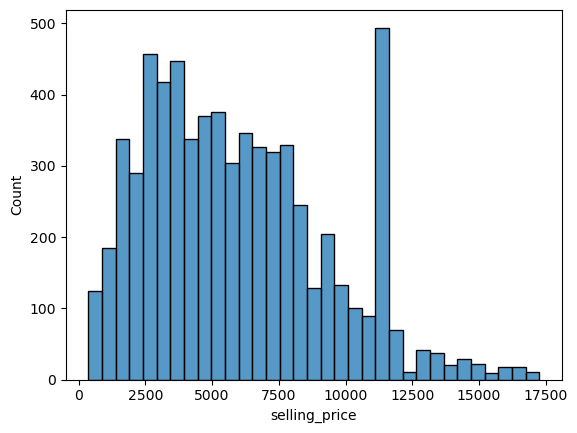

In [671]:
sns.histplot(df_motorAlpes_outliers['selling_price'])

<AxesSubplot: xlabel='selling_price', ylabel='Count'>

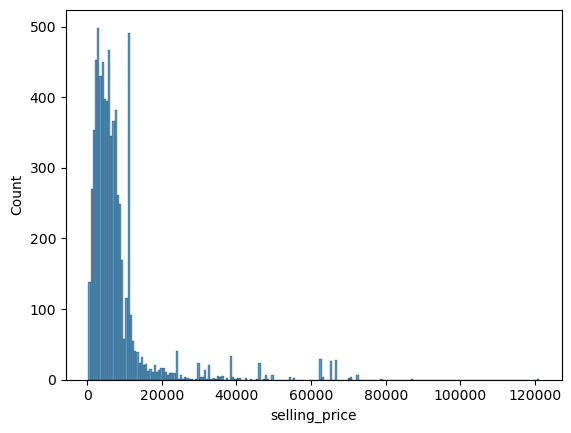

In [672]:
sns.histplot(df_motorAlpes['selling_price'])